## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/clean_data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,1970-01-01 00:00:00.000000000,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,6,15.1,95.918703,4.4300,0.0,9.0,0,2,True,10.522170
1,1970-01-01 00:00:00.000000001,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,6,16.9,92.281316,3.8800,0.0,9.0,0,3,True,10.062332
2,1970-01-01 00:00:00.000000002,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,6,21.1,90.599165,3.6300,0.0,9.0,0,1,False,9.673387
3,1970-01-01 00:00:00.000000003,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,6,24.9,89.638811,2.8512,0.0,9.0,0,5,False,9.411519
4,1970-01-01 00:00:00.000000004,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,6,24.0,89.760414,3.3908,0.0,9.0,0,6,False,9.515179


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['Health_Risk_Score'],axis=1)

In [5]:
X.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,source,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend
0,1970-01-01 00:00:00.000000000,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,0,6,15.1,95.918703,4.4300,0.0,9.0,0,2,True
1,1970-01-01 00:00:00.000000001,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,1,6,16.9,92.281316,3.8800,0.0,9.0,0,3,True
2,1970-01-01 00:00:00.000000002,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,1,6,21.1,90.599165,3.6300,0.0,9.0,0,1,False
3,1970-01-01 00:00:00.000000003,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,1,6,24.9,89.638811,2.8512,0.0,9.0,0,5,False
4,1970-01-01 00:00:00.000000004,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,1,6,24.0,89.760414,3.3908,0.0,9.0,0,6,False


In [6]:
y = df['Health_Risk_Score']

In [7]:
y

0      10.522170
1      10.062332
2       9.673387
3       9.411519
4       9.515179
         ...    
995     8.750142
996     9.118198
997     9.880093
998     9.561602
999    10.978044
Name: Health_Risk_Score, Length: 1000, dtype: float64

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 58)

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 58), (200, 58))

#### Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
df.isnull().sum().sort_values(ascending=False)

datetime             0
solarenergy          0
severerisk           0
sunrise              0
sunriseEpoch         0
sunset               0
sunsetEpoch          0
moonphase            0
conditions           0
description          0
icon                 0
source               0
City                 0
Temp_Range           0
Heat_Index           0
Severity_Score       0
Condition_Code       0
Month                0
Season               0
Day_of_Week          0
Is_Weekend           0
uvindex              0
solarradiation       0
datetimeEpoch        0
visibility           0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
pressure             0
cloudcover 

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1075
- Mean Absolute Error: 0.0842
- R2 Score: 0.9757
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1128
- Mean Absolute Error: 0.0853
- R2 Score: 0.9680


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.6896
- Mean Absolute Error: 0.5830
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6385
- Mean Absolute Error: 0.5487
- R2 Score: -0.0247


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1076
- Mean Absolute Error: 0.0845
- R2 Score: 0.9756
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1120
- Mean Absolute Error: 0.0842
- R2 Score: 0.9685


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0676
- Mean Absolute Error: 0.0503
- R2 Score: 0.9904
----------------------

### Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.979974
7,CatBoosting Regressor,0.979384
2,Ridge,0.968486
0,Linear Regression,0.968035
5,Random Forest Regressor,0.963141
6,XGBRegressor,0.951807
4,Decision Tree,0.944745
8,AdaBoost Regressor,0.917585
1,Lasso,-0.024657


## Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 96.80


## Plot y_pred and y_test

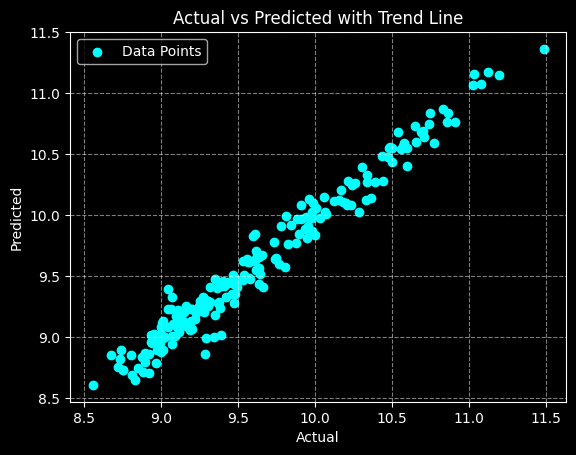

In [17]:
plt.style.use('dark_background')

plt.scatter(y_test, y_pred, c='cyan', label='Data Points') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted with Trend Line')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


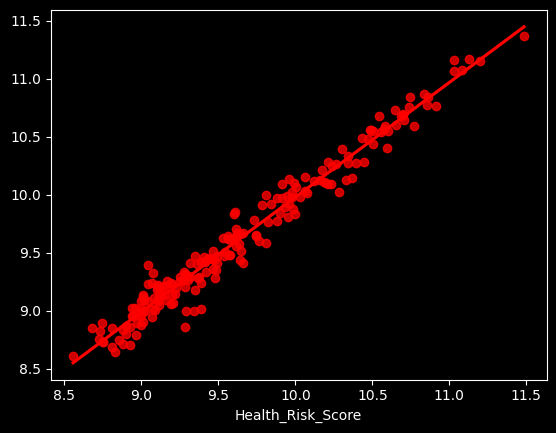

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,11.126847,11.172294,-0.045448
737,9.008292,9.122008,-0.113716
740,9.490562,9.414546,0.076015
660,9.571453,9.617911,-0.046458
411,8.811593,8.689439,0.122155
...,...,...,...
408,8.925227,8.707148,0.218079
332,10.472771,10.475895,-0.003124
208,9.113731,9.185991,-0.072260
613,9.341489,9.001925,0.339564


In [20]:
df.select_dtypes(include=['int64','float64']).columns

Index(['datetimeEpoch', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase', 'conditions',
       'description', 'icon', 'source', 'City', 'Temp_Range', 'Heat_Index',
       'Severity_Score', 'Condition_Code', 'Month', 'Season', 'Day_of_Week',
       'Health_Risk_Score'],
      dtype='object')

In [21]:
df.select_dtypes(include=['object', 'category'])

,datetime
0,1970-01-01 00:00:00.000000000
1,1970-01-01 00:00:00.000000001
2,1970-01-01 00:00:00.000000002
3,1970-01-01 00:00:00.000000003
4,1970-01-01 00:00:00.000000004
...,...
995,1970-01-01 00:00:00.000000011
996,1970-01-01 00:00:00.000000010
997,1970-01-01 00:00:00.000000005
998,1970-01-01 00:00:00.000000007
